In [ ]:
import requests, pandas as pd, urllib.parse
from datetime import datetime

def fetch_yahoo(sym, start, end):
    s, e = int(start.timestamp()), int(end.timestamp())
    sym_enc = urllib.parse.quote(sym, safe='')
    url     = f"https://query1.finance.yahoo.com/v8/finance/chart/{sym_enc}"
    params  = {"period1": s, "period2": e, "interval":"1h", "events":"history"}
    headers = {"User-Agent":"Mozilla/5.0"}

    r = requests.get(url, params=params, headers=headers)
    r.raise_for_status()
    data = r.json()

    chart = data.get("chart", {})
    if chart.get("error"):
        raise ValueError(f"Yahoo API error for {sym}: {chart['error']['description']}")

    results = chart.get("result")
    if not results:
        raise ValueError(f"No data returned for symbol {sym}")

    ts = results[0]
    if "timestamp" not in ts or not ts["timestamp"]:
        raise ValueError(f"No timestamps in response for {sym}")

    df = pd.DataFrame({
        "Date":   pd.to_datetime(ts["timestamp"], unit="s"),
        "Open":   ts["indicators"]["quote"][0]["open"],
        "High":   ts["indicators"]["quote"][0]["high"],
        "Low":    ts["indicators"]["quote"][0]["low"],
        "Close":  ts["indicators"]["quote"][0]["close"],
        "Volume": ts["indicators"]["quote"][0]["volume"],
    }).set_index("Date")

    return df


start = datetime(2015,1,1)
end   = datetime(2025,7,10)

brent = fetch_yahoo("BZ=F", start, end)
gold  = fetch_yahoo("GC=F", start, end)

brent.index = brent.index.strftime('%Y-%m-%d')
gold .index = gold.index .strftime('%Y-%m-%d')

print("Brent last:", brent.tail(1))
print("Gold last: ", gold.tail(1))



Brent last:                  Open       High        Low      Close   Volume
Date                                                           
2025-07-09  69.900002  70.699997  69.610001  70.190002  34109.0
Gold last:                     Open    High     Low        Close  Volume
Date                                                        
2025-07-09  3289.399902  3314.0  3282.0  3311.600098   909.0


veri setini genişletip petrol ve altın fiyatını eklemek için bu dosya.


In [11]:
brent.to_csv("brent_ohlcv.csv")
gold.to_csv("gold_ohlcv.csv")


In [ ]:
from datetime import datetime


start = datetime(2015, 1, 1)
end   = datetime(2025, 7, 10)


btc = fetch_yahoo("BTC-USD", start, end)


btc.to_csv("btc_ohlcv.csv", columns=["Open","High","Low","Close","Volume"])


In [20]:
df = pd.read_csv("bitcoin_history.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Feb 20, 2025","96,628.40","98,722.29","96,481.41","98,347.95","98,347.95","31,327,236,096"
1,"Feb 19, 2025","95,532.53","96,855.59","95,011.97","96,635.61","96,635.61","28,990,872,862"
2,"Feb 18, 2025","95,773.81","96,695.38","93,388.84","95,539.55","95,539.55","37,325,720,482"
3,"Feb 17, 2025","96,179.01","97,032.23","95,243.55","95,773.38","95,773.38","27,336,550,690"
4,"Feb 16, 2025","97,580.49","97,725.59","96,060.98","96,175.03","96,175.03","16,536,755,396"
...,...,...,...,...,...,...,...
3805,"Sep 21, 2014",408.08,412.43,393.18,398.82,398.82,"26,580,100"
3806,"Sep 20, 2014",394.67,423.30,389.88,408.90,408.90,"36,863,600"
3807,"Sep 19, 2014",424.10,427.83,384.53,394.80,394.80,"37,919,700"
3808,"Sep 18, 2014",456.86,456.86,413.10,424.44,424.44,"34,483,200"


In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')


df.set_index('Date', inplace=True)


df = df.sort_index()           

print(df.head())
print(df.tail())

              Open    High     Low   Close Adj Close      Volume
Date                                                            
2014-09-17  465.86  468.17  452.42  457.33    457.33  21,056,800
2014-09-18  456.86  456.86  413.10  424.44    424.44  34,483,200
2014-09-19  424.10  427.83  384.53  394.80    394.80  37,919,700
2014-09-20  394.67  423.30  389.88  408.90    408.90  36,863,600
2014-09-21  408.08  412.43  393.18  398.82    398.82  26,580,100
                 Open       High        Low      Close  Adj Close  \
Date                                                                
2025-02-16  97,580.49  97,725.59  96,060.98  96,175.03  96,175.03   
2025-02-17  96,179.01  97,032.23  95,243.55  95,773.38  95,773.38   
2025-02-18  95,773.81  96,695.38  93,388.84  95,539.55  95,539.55   
2025-02-19  95,532.53  96,855.59  95,011.97  96,635.61  96,635.61   
2025-02-20  96,628.40  98,722.29  96,481.41  98,347.95  98,347.95   

                    Volume  
Date                        
202

Epoch 1/100


c:\Users\ASUS\Desktop\470_project\env\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


84/86 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1602

86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 1.1608 - val_loss: 0.8219
Epoch 2/100
83/86 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1507

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.1517 - val_loss: 0.8113
Epoch 3/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.2037 - val_loss: 0.8130
Epoch 4/100
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1.1558

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.1561 - val_loss: 0.8111
Epoch 5/100
85/86 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.1123

86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.1136 - val_loss: 0.7892
Epoch 6/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.0809 - val_loss: 0.8191
Epoch 7/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 1.1584 - val_loss: 0.8008
Epoch 8/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.2035 - val_loss: 0.7990
Epoch 9/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.3392 - val_loss: 0.8030
Epoch 10/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.1346 - val_loss: 0.8175
Epoch 11/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.0674 - val_loss: 0.8060
Epoch 12/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.1932 - val_loss: 0.7984
Epoch 13/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.1287 - val_loss: 0.8055
Epoch 14/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.1409 - val_loss: 0.8078
Epoch 15/100
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 1.1884 - val_loss: 0.8065
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


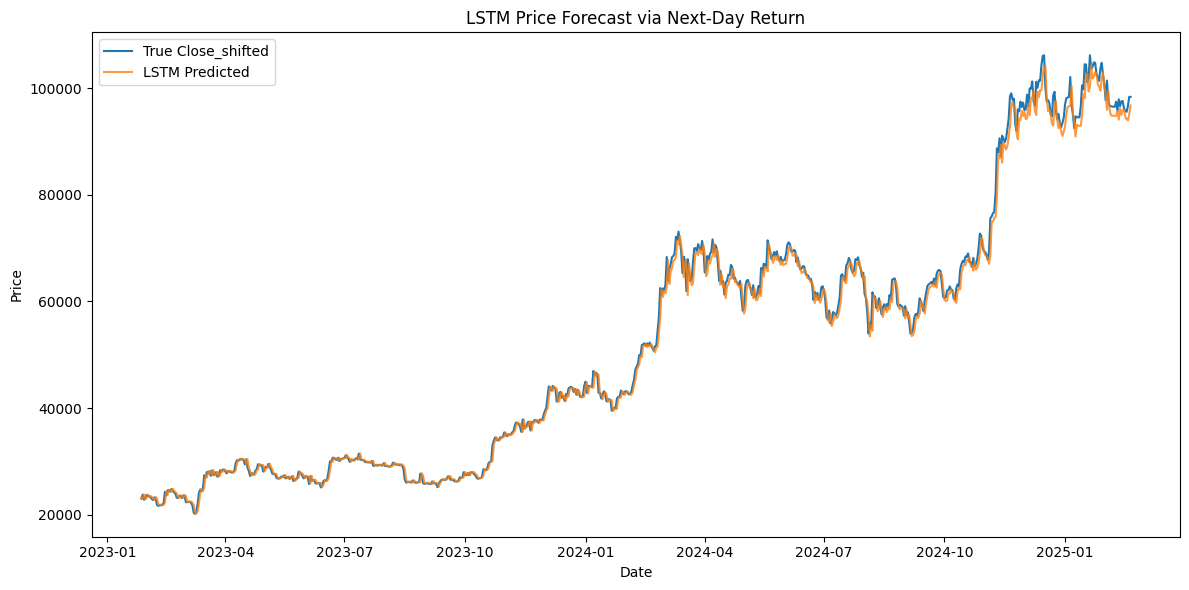

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


df = pd.read_csv('df_copy.csv', index_col=0, parse_dates=True)
df = df[['Open', 'Close', 'Low', 'High', 'Volume', 'Close_shifted']].dropna()


df['Return'] = df['Close_shifted'] / df['Close'] - 1
df = df.dropna()


feature_cols = ['Open', 'Close', 'Low', 'High', 'Volume']
X_raw = df[feature_cols].values
y_raw = df['Return'].values.reshape(-1, 1)


scaler_X = StandardScaler().fit(X_raw)
scaler_y = StandardScaler().fit(y_raw)
X_scaled = scaler_X.transform(X_raw)
y_scaled = scaler_y.transform(y_raw)


def make_sequences(X, y, window):
    Xs, ys = [], []
    for i in range(window, len(X)):
        Xs.append(X[i-window:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

window_size = 30
X_seq, y_seq = make_sequences(X_scaled, y_scaled, window_size)


split_idx = int(len(X_seq) * 0.8)
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]


model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window_size, len(feature_cols))),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse')


es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
mc = ModelCheckpoint('best_lstm.h5', monitor='val_loss', save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=100,
    batch_size=32,
    callbacks=[es, mc],
    verbose=1
)


y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()
y_true = scaler_y.inverse_transform(y_test).flatten()


start = window_size + split_idx
close_values = df['Close'].iloc[start:start + len(y_pred)].values
price_pred = close_values * (1 + y_pred)
price_true = df['Close_shifted'].iloc[start:start + len(y_pred)].values
dates = df.index[start:start + len(y_pred)]


plt.figure(figsize=(12,6))
plt.plot(dates, price_true, label='True Close_shifted')
plt.plot(dates, price_pred, label='LSTM Predicted', alpha=0.8)
plt.title('LSTM Price Forecast via Next‑Day Return')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()
